# <center>PyTorch</center>
---

In [1]:
import torch

In [2]:
x = torch.Tensor([2,5])
y = torch.Tensor([3,9])

print(x*y)

tensor([ 6., 45.])


In [3]:
zeros = torch.zeros(size=(3,3))

print(zeros)

tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])


In [4]:
random = torch.rand(size=(3,3))

print(random)

tensor([[0.7755, 0.4725, 0.6426],
        [0.1272, 0.3180, 0.4422],
        [0.6498, 0.2719, 0.7316]])


In [5]:
# Returns a new tensor with the same data as the :attr:`self` tensor but of a different :attr:`shape`
print(random.view((9,))) # 1D

print(random.view((9,1))) # 2D

tensor([0.7755, 0.4725, 0.6426, 0.1272, 0.3180, 0.4422, 0.6498, 0.2719, 0.7316])
tensor([[0.7755],
        [0.4725],
        [0.6426],
        [0.1272],
        [0.3180],
        [0.4422],
        [0.6498],
        [0.2719],
        [0.7316]])


## Data

In [6]:
import torch
import torchvision

In [7]:
# torchvision datasets
total_datasets = dir(torchvision.datasets)

print(f"Total number of datasets in torchvision.datasets are \n{list(total_datasets)}")

Total number of datasets in torchvision.datasets are 
['CIFAR10', 'CIFAR100', 'CLEVRClassification', 'CREStereo', 'Caltech101', 'Caltech256', 'CarlaStereo', 'CelebA', 'Cityscapes', 'CocoCaptions', 'CocoDetection', 'Country211', 'DTD', 'DatasetFolder', 'EMNIST', 'ETH3DStereo', 'EuroSAT', 'FER2013', 'FGVCAircraft', 'FakeData', 'FallingThingsStereo', 'FashionMNIST', 'Flickr30k', 'Flickr8k', 'Flowers102', 'FlyingChairs', 'FlyingThings3D', 'Food101', 'GTSRB', 'HD1K', 'HMDB51', 'INaturalist', 'ImageFolder', 'ImageNet', 'InStereo2k', 'KMNIST', 'Kinetics', 'Kitti', 'Kitti2012Stereo', 'Kitti2015Stereo', 'KittiFlow', 'LFWPairs', 'LFWPeople', 'LSUN', 'LSUNClass', 'MNIST', 'Middlebury2014Stereo', 'MovingMNIST', 'Omniglot', 'OxfordIIITPet', 'PCAM', 'PhotoTour', 'Places365', 'QMNIST', 'RenderedSST2', 'SBDataset', 'SBU', 'SEMEION', 'STL10', 'SUN397', 'SVHN', 'SceneFlowStereo', 'Sintel', 'SintelStereo', 'StanfordCars', 'UCF101', 'USPS', 'VOCDetection', 'VOCSegmentation', 'VisionDataset', 'WIDERFace', 

In [8]:
# torchvision transformations
total_Transformations = dir(torchvision.transforms)

print(f"Total number of transformations in torchvision.transforms are \n{list(total_Transformations)}")

Total number of transformations in torchvision.transforms are 
['AugMix', 'AutoAugment', 'AutoAugmentPolicy', 'CenterCrop', 'ColorJitter', 'Compose', 'ConvertImageDtype', 'ElasticTransform', 'FiveCrop', 'GaussianBlur', 'Grayscale', 'InterpolationMode', 'Lambda', 'LinearTransformation', 'Normalize', 'PILToTensor', 'Pad', 'RandAugment', 'RandomAdjustSharpness', 'RandomAffine', 'RandomApply', 'RandomAutocontrast', 'RandomChoice', 'RandomCrop', 'RandomEqualize', 'RandomErasing', 'RandomGrayscale', 'RandomHorizontalFlip', 'RandomInvert', 'RandomOrder', 'RandomPerspective', 'RandomPosterize', 'RandomResizedCrop', 'RandomRotation', 'RandomSolarize', 'RandomVerticalFlip', 'Resize', 'TenCrop', 'ToPILImage', 'ToTensor', 'TrivialAugmentWide', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', '_functional_pil', '_functional_tensor', '_presets', 'autoaugment', 'functional', 'transforms']


### First, split the data (train, test)

#### Load Data

In [9]:
from torchvision import transforms
from torchvision import datasets

train = datasets.MNIST(
    root = "",
    train= True,
    download = True,
    transform = transforms.Compose([
        transforms.ToTensor() 
    ])
)

print(train)

test = datasets.MNIST(
    root = "",
    train= False,
    download = True,
    transform = transforms.Compose([
        transforms.ToTensor() 
    ])
)

print(test)

Dataset MNIST
    Number of datapoints: 60000
    Root location: 
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
           )
Dataset MNIST
    Number of datapoints: 10000
    Root location: 
    Split: Test
    StandardTransform
Transform: Compose(
               ToTensor()
           )


#### Shuffle train data

Shuffling the data is a common technique to **improve** the **generalization** and **robustness** of a deep learning model. It helps to **avoid overfitting** and **reduce** the **correlation** between consecutive batches of data. However, shuffling the data is only necessary for the training set, not the test set. The test set is used to evaluate the performance of the model on unseen data, and shuffling it does not affect the accuracy or other metrics. Therefore, we should only shuffle the train dataloader in PyTorch, not the test dataloader.

#### Create dataloader

In [10]:
train_dataloader = torch.utils.data.DataLoader(
    dataset = train,
    batch_size = 16,
    shuffle = True
)

print(train_dataloader)

test_dataloader = torch.utils.data.DataLoader(
    dataset = test,
    batch_size = 16,
    shuffle = False
)

print(test_dataloader)

In [11]:
for data in train_dataloader:
    print(data[0].shape)
    print(data)
    break

torch.Size([16, 1, 28, 28])
[tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
  

torch.Size([1, 28, 28])
torch.Size([])
tensor(4)


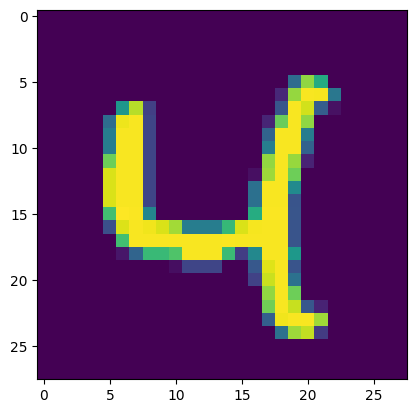

In [12]:
import matplotlib.pyplot as plt

xs = data[0] # (batch) 16 2D images
ys = data[1] # (batch) 16 images's labels

x = xs[0] # single image
y = ys[0] # single label

print(x.shape)
print(y.shape)
print(y)

plt.imshow(x.view(28,28))
plt.show()

## Build our own Neural Network

In [13]:
import torch.nn as nn
import torch.nn.functional as F

* **fc1** is nothing but **Fully connected layer 1** defined by **`nn.Linear()`**
* **fc2** is nothing but **Fully connected layer 2** defined by **`nn.Linear()`**

In [23]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        # input features in this fc1 is decided by the input dimension, and the output can be anything we decide as, it's a hidden layer
        self.fc1 = nn.Linear(in_features = 28 * 28, out_features = 64)
        # input features of this fc2 must be equal to the output features of the previous layer (fc1, and the output feature is user dependent
        self.fc2 = nn.Linear(in_features = 64, out_features = 128)
        # input features of this fc3 must be equal to the output features of the previous layer (fc2), and the output feature is user dependent 
        self.fc3 = nn.Linear(in_features = 128, out_features = 64)
        # input features of this fc4 must be equal to the output features of the previous layer (fc3), and the output feature is 10
        # as this is the output or final layer and since we are doing classification where we have 10 categories, hence the value 10
        self.fc4 = nn.Linear(in_features = 64, out_features = 10)

    # forward propagation: defines how the data flows through the Neural Network
    def forward(self, data):
        data = F.relu(self.fc1(data))
        data = F.relu(self.fc2(data))
        data = F.relu(self.fc3(data))
        data = F.log_softmax(self.fc4(data), dim=1)
        return data

net = Net()
print(net)

Net(
  (fc1): Linear(in_features=784, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=128, bias=True)
  (fc3): Linear(in_features=128, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
)


In [32]:
x = torch.randn((28,28))
print(x.shape)

x = x.view((-1, 28*28))
print(x.shape)

print("\nAfter passing the data through the Network:")
print(net(x))

torch.Size([28, 28])
torch.Size([1, 784])

After passing the data through the Network:
tensor([[-2.3817, -2.2067, -2.3043, -2.4608, -2.3490, -2.3229, -2.2800, -2.2431,
         -2.3158, -2.1912]], grad_fn=<LogSoftmaxBackward0>)


## Training Model

In [46]:
import torch.optim as optim

optimizer = optim.Adam(
    params = net.parameters(),
    lr = 0.001
)

print(optimizer)

EPOCHS = 3

for epoch in range(EPOCHS):
    for data in train_dataloader:
        X, y = data

        output = net(X.view((-1, 28*28)))
        loss = F.nll_loss(input = output, target=y) # negative log likelihood loss
        loss.backward() # backpropagation
        optimizer.step() # adjust the parameters
    print(loss)

Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: None
    lr: 0.001
    maximize: False
    weight_decay: 0
)
tensor(2.2136, grad_fn=<NllLossBackward0>)
tensor(2.5160, grad_fn=<NllLossBackward0>)
tensor(2.4375, grad_fn=<NllLossBackward0>)


In [50]:
correct = 0
total = 0
with torch.no_grad():
    for data in train_dataloader:
        X, y = data
        output = net(X.view(-1, 28*28))
        for idx, i in enumerate(output):
            if torch.argmax(i) == y[idx]:
                correct += 1
            total+= 1
print(f"Accuracy: {correct/total:.4f}")      

Accuracy: 0.1044


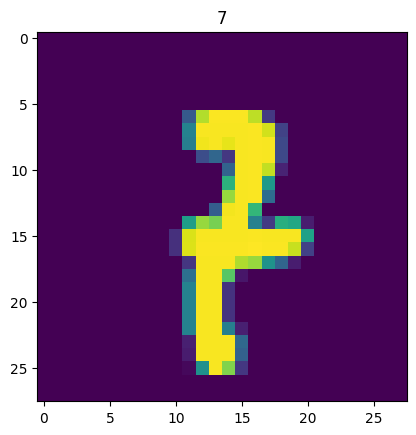

In [55]:
plt.imshow(X[0].view(28,28))
plt.title(f"{y[0]}")
plt.show()

In [58]:
torch.argmax(net(X[0].view(-1, 28*28)))

tensor(7)